## Лабораторная работа №12. Решение задач глубокого обучения.

Используемый набор данных: [banknote authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267"
downloadFile(url + "/data_banknote_authentication.txt", "dataset/data_banknote_authentication.txt")

Опишем заголовки колонок. Для удобства используем сокращенные названия:
- **Variance** - Variance of Wavelet Transformed image.
- **Skewness** - Skewness of Wavelet Transformed image.
- **Curtosis** - Curtosis of Wavelet Transformed image.
- **Entropy** - Entropy of image.

In [3]:
headers = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]  
data = pd.read_csv("dataset/data_banknote_authentication.txt", names=headers)
data = data.astype({"Class": "category"})
data.sample(20)

,Variance,Skewness,Curtosis,Entropy,Class
139,-0.206200,9.2207,-3.7044,-6.810300,0
959,-6.397900,6.4479,1.0836,-6.617600,1
1237,-0.887280,2.8080,-3.1432,-1.203500,1
226,0.570600,-0.0248,1.2421,-0.562100,0
406,0.147830,7.9460,1.0742,-3.340900,0
459,0.774450,9.0552,-2.4089,-1.388400,0
448,3.936400,10.5885,-3.7250,-4.313300,0
432,5.177600,8.2316,-3.2511,-1.569400,0
326,-0.161080,-6.4624,8.3573,-1.521600,0
455,2.668200,10.2160,-3.4414,-4.006900,0


In [4]:
display(data.describe())
display(data.isna().sum())

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Подготовим данные: выберем признаки и метки и сформируем тренировочные и тестовые наборы.

In [5]:
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

X = data.drop(columns=["Class"]).copy()
X_norm = pd.DataFrame(normalize(X), columns=headers[:-1])
y = data["Class"].copy()

X_norm.sample(20)

,Variance,Skewness,Curtosis,Entropy
1349,0.272411,0.219240,0.568859,0.744396
1188,0.109729,0.253439,0.640676,0.716424
725,0.705662,0.155182,0.584965,0.368477
886,0.220298,0.038628,0.715819,0.661498
339,0.526284,0.574572,0.328851,0.533619
152,0.704113,0.239952,0.312698,0.590651
973,0.694886,0.705468,0.016755,0.138448
1092,0.289841,0.030590,0.877171,0.381611
81,0.672317,0.335889,0.374707,0.542921
687,0.386899,0.736524,0.455482,0.316825


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

Создадим нейронную сеть

In [7]:
model = keras.Sequential([
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train.to_numpy(), y_train.to_numpy(), batch_size=16, epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 776us/step - loss: 0.6735 - accuracy: 0.5539
Epoch 2/100
58/58 [==============================] - 0s 845us/step - loss: 0.6680 - accuracy: 0.5495
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.5495
Epoch 4/100
58/58 [==============================] - 0s 741us/step - loss: 0.6468 - accuracy: 0.5495
Epoch 5/100
58/58 [==============================] - 0s 931us/step - loss: 0.6277 - accuracy: 0.6094
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6518
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.6746
Epoch 8/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.7029
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.7171
Epoch 10/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7323
E

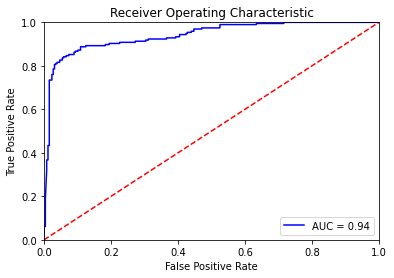

In [8]:
def calc_plot_roc(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

calc_plot_roc(model, X_test, y_test)